In [40]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
import sys
# sys.path.append('/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/CODE_REPOSITORY')
from linear_algebra import *
from gradient_descent import *
print 'IMPORT DONE'

IMPORT DONE


### PERCEPTRON

In [8]:
# PERCEPTRON FIRING FUNCTIONS
def step_function(x):
    return 1 if x >= 0 else 0
def perceptron_output(weights, bias, x):
    # return 1 if the perceptron fires, 0 otherwise.
    return step_function(dot(weights, x) + bias)

In [16]:
# DEMO
andGate = [[2,2],-3]
print 'AND GATE: '
print '0 0 |', perceptron_output(andGate[0], andGate[1], [0,1])
print '0 1 |', perceptron_output(andGate[0], andGate[1], [0,1])
print '1 0 |', perceptron_output(andGate[0], andGate[1], [1,0])
print '1 1 |', perceptron_output(andGate[0], andGate[1], [1,1])
orGate = [[2,2],-1]
print 'OR GATE: '
print '0 0 |', perceptron_output(orGate[0], orGate[1], [0,0])
print '0 1 |', perceptron_output(orGate[0], orGate[1], [0,1])
print '1 0 |', perceptron_output(orGate[0], orGate[1], [1,0])
print '1 1 |', perceptron_output(orGate[0], orGate[1], [1,1])

AND GATE: 
0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1
OR GATE: 
0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


### FEED-FORWARD NN

In [50]:
# SIGMOID FUNCTION
#  why sigmoid? because in order to train an NN, we need do differentiation, which
#  requires smooth functions, and step function is not smooth whereas sigmoid is.
def sigmoid(t):
    return 1.0 / (1 + math.exp(-t))

In [23]:
# COMPARING SIGMOID & SOFTMAX

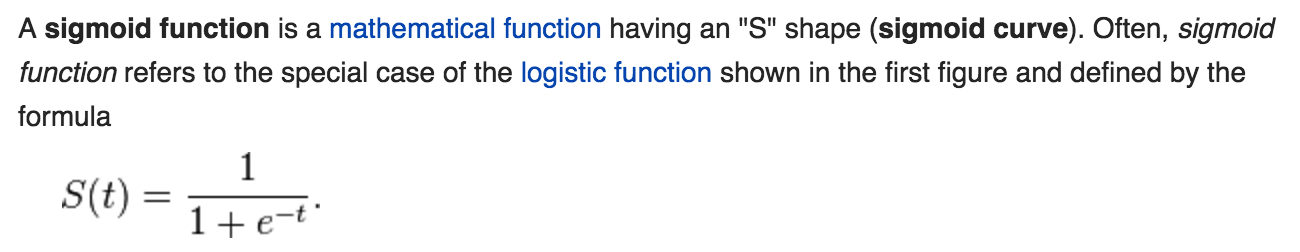

In [29]:
# SIGMOID: a single value mapped to [0, 1] after sigmoid transformation.
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/sigmoid_fn.png', 
      width="50%")

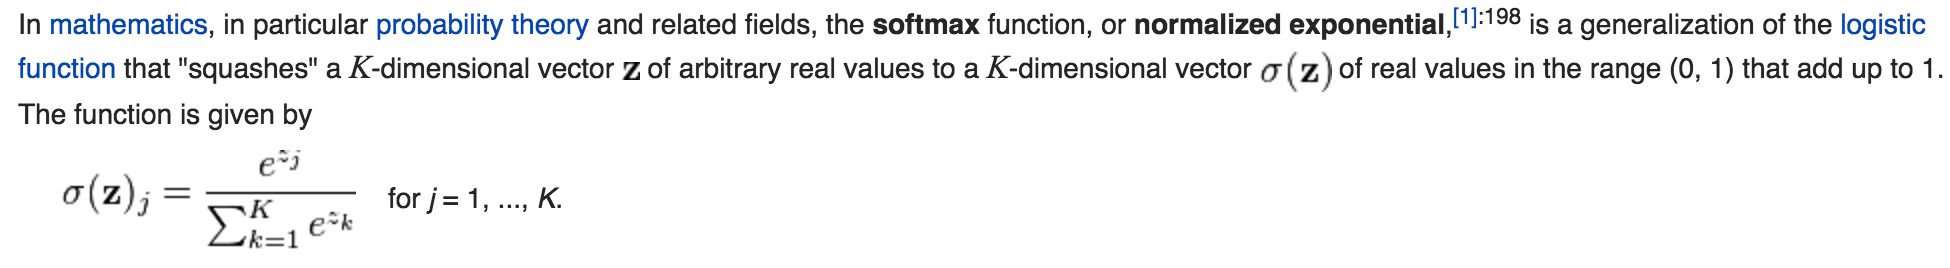

In [30]:
# SOFTMAX: all values in a vector must add up to 1 after softmax transformation.
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/softmax_fn.png', 
      width="80%")

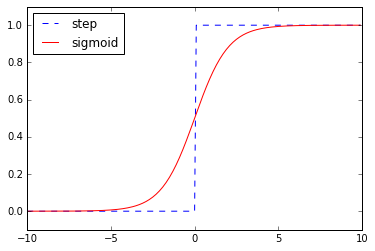

In [49]:
# COMPARING STEP & SIGMOID
plt.ylim(-.1, 1.1)
plt.plot(np.arange(-10,10,.1), [step_function(i) for i in np.arange(-10,10,.1)], 'b--')
plt.plot(np.arange(-10,10,.1), [sigmoid(i) for i in np.arange(-10,10,.1)], 'r')
plt.legend(['step','sigmoid'], loc=2)

In [57]:
# OUTPUT OF FNN
def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

In [58]:
# FNN FUNCTION
def feed_forward(nn, inputVector):
    # nn is represented as a list of lists of lists of weights.
    #  i.e. [nn [layer [neuron w1,..,wp], .. ], [layer [neuron w1,..,wp], .. ], ... ].
    #  neural: a list of weights; layer: a list of neurons; nn: a list of layers.
    outputs = []
    for layer in nn: # process layer-by-layer.
        inputWithBias = inputVector + [1] # add bias term.
        output = [neuron_output(neuron, inputWithBias) for neuron in layer]
        outputs.append(output)
        inputVector = output
    return outputs

XOR GATE:
0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


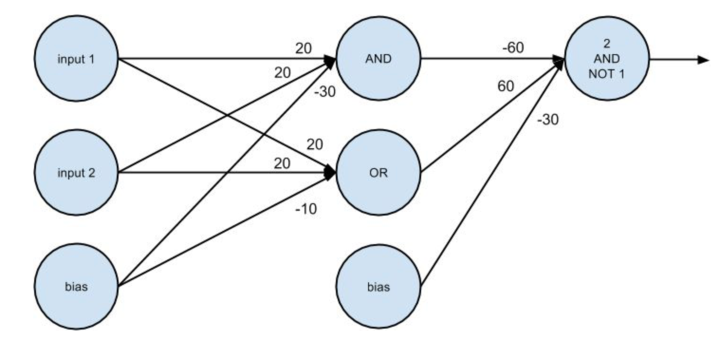

In [192]:
# DEMO
xorNN = [
    [[20,20,-30],  # and neuron.
     [20,20,-10]], # or neuron.
    [[-60,60,-30]] # 2nd but not 1st input neuron.
]
print 'XOR GATE:'
for x in [0, 1]:
    for y in [0, 1]:
        outputs = feed_forward(xorNN, [x, y])[-1][0] # we only care about the value at output layer.
        print x, y, '|', 1 if outputs > .5 else 0
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/xor_nn.png', 
      width="40%")

### BACKPROPAGATION
* RUN FEED-FORWARD on an input vector to produce the outputs of all the neurons in the network.
* This results in an ERROR FOR EACH OUTPUT neuron -- the difference between its output and its target.
* COMPUTE THE GRADIENT of this error as a function of the neuron's weights, and adjust its weights in the direction that most decreases the error.
* PROPAGATE these output errors backward to infer errors for the hidden layer.
* COMPUTE THE GRADIENT of these errors and ADJUST THE HIDDEN LAYER's weights in the same manner.

In [189]:
def backpropagate(nn, inputVector, targets):
    hiddenOutputs, outputs = feed_forward(nn, inputVector) 
        # feed_forwards outputs: [ [hidden [..],[..],..], [output [..]]].
    outputDeltas = [output*(1-output)*(output-target) for output,target in zip(outputs,targets)]
        # output * (1-output) is from the derivative of sigmoid.
        # d(sigmoid)/dx = sigmoid*(1-sigmoid).
        # NB: derivative/gd: direction of adjustment.
        # NB: essentially, the adjustment is direction*error.
    for i, outputNeuron in enumerate(nn[-1]): # for each output neuron.
        for j, hiddenOutput in enumerate(hiddenOutputs + [1]): # for each hidden neuron in each output.
            outputNeuron[j] -= outputDeltas[i] * hiddenOutput 
                # forward-feeding direction: hidden -> output.
                # therefore, hidden * (direction*error) -> output to adjust output.
    hiddenDeltas = [hiddenOutput*(1-hiddenOutput)*dot(outputDeltas, [n[i] for n in nn[-1]])
                    for i,hiddenOutput in enumerate(hiddenOutputs)]
    for i, hiddenNeuron in enumerate(nn[0]):
        for j, input in enumerate(inputVector + [1]):
            hiddenNeuron[j] -= hiddenDeltas[i] * input
    return nn # NB: this is not necessary in some implementation styles!!!

In [201]:
# DEMO: XOR TRAINING IN ACTION (CAUTION: 50s TO RUN!!!)
%%time
xorNN = [
    [[random.random() for _ in range(3)],  # and neuron.
     [random.random() for _ in range(3)]], # or neuron.
    [[random.random() for _ in range(3)]] # 2nd but not 1st input neuron.
]
def run_xor():
    for x in [0, 1]:
        for y in [0, 1]:
            outputs = feed_forward(xorNN, [x, y])[-1][0] # we only care about the value at output layer.
            print x, y, '|', 1 if outputs > .5 else 0
inputs = [[0,0],[0,1],[1,0],[1,1]]
targets = [[0],[1],[1],[0]]
def train_xor(nn, inputs, targets):
    for i in range(4):
        nn = backpropagate(nn, inputs[i], targets[i])
    return nn
for _ in range(1000000):
    xorNN = train_xor(xorNN, inputs, targets)
run_xor() # PRODUCES THE CORRECT RESULTS.

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0
CPU times: user 56.4 s, sys: 165 ms, total: 56.5 s
Wall time: 56.5 s


### EXAMPLE: DIGIT RECOGNITION

In [202]:
# INPUT
zero = [1,1,1,1,1,
        1,0,0,0,1,
        1,0,0,0,1,
        1,0,0,0,1,
        1,1,1,1,1]
one = [0,0,1,0,0,
       0,0,1,0,0,
       0,0,1,0,0,
       0,0,1,0,0,
       0,0,1,0,0]
two = [1,1,1,1,1,
       0,0,0,0,1,
       1,1,1,1,1,
       1,0,0,0,0,
       1,1,1,1,1]
three = [1,1,1,1,1,
         0,0,0,0,1,
         1,1,1,1,1,
         0,0,0,0,1,
         1,1,1,1,1]
four = [1,0,0,0,1,
        1,0,0,0,1,
        1,1,1,1,1,
        0,0,0,0,1,
        0,0,0,0,1]
five = [1,1,1,1,1,
        1,0,0,0,0,
        1,1,1,1,1,
        0,0,0,0,1,
        1,1,1,1,1]
six = [1,1,1,1,1,
       1,0,0,0,0,
       1,1,1,1,1,
       1,0,0,0,1,
       1,1,1,1,1]
seven = [1,1,1,1,1,
         0,0,0,0,1,
         0,0,0,0,1,
         0,0,0,0,1,
         0,0,0,0,1]
eight = [1,1,1,1,1,
         1,0,0,0,1,
         1,1,1,1,1,
         1,0,0,0,1,
         1,1,1,1,1]
nine = [1,1,1,1,1,
        1,0,0,0,1,
        1,1,1,1,1,
        0,0,0,0,1,
        1,1,1,1,1]
inputs = [zero,one,two,three,four,five,six,seven,eight,nine]

In [203]:
# TARGET
targets = [[1 if i==j else 0 for i in range(10)] for j in range(10)]
targets

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [204]:
# INITIALIZE NETWORK
random.seed(0)
inputSize = 25 # each input is a vector of length 25.
numHidden = 5 # 5 neurons in the hidden layer.
outputSize = 10 # 10 outputs for each input (e.g. 1 is represented with [0,1,0,0,...]).
hiddenLayer = [[random.random() for _ in range(inputSize+1)] for _ in range(numHidden)]
    # a list of 5 len=26 lists.
    # hiddenlayer has 5 neurons, each has 26 (i.e. 25+1) weights.
outputLayer = [[random.random() for _ in range(numHidden+1)] for _ in range(outputSize)]
    # a list of 10 len=6 lists.
    # outputlayer outputs a len=10 vector, each is connected by 6 (i.e. 5+1) hidden neurons.
nn = [hiddenLayer, outputLayer] # network starts with random weights.

In [206]:
%%time
for _ in range(10000):
    for inputVector, targetVector in zip(inputs, targets):
        backpropagate(nn, inputVector, targetVector)

CPU times: user 10.9 s, sys: 24.4 ms, total: 10.9 s
Wall time: 10.9 s


In [213]:
def predict(input):
    predVector = feed_forward(nn, input)[-1]
    return predVector.index(max(predVector))
print predict(inputs[7])

7
